<h1>Exercise set 4: Bifurcations (18/10 - 29/10)</h1>
<h2> 4.1 Transcritical bifurcation </h2>
<h3> 4.1.1 The Allee effect </h3>

In [1]:
"""
imports
"""

import numpy as np                          # Math
import matplotlib.pyplot as plt             # Plotting
import matplotlib.patches as mpatches       # legend
import matplotlib as mpl                    # Matplotlib
from matplotlib import colors
from ipywidgets import interact             # Interactivity
from sympy.solvers import solve, nsolve     # Numerically solve equations
from sympy import Symbol, exp               # Symbols
import ipywidgets as widgets                # Widgets

In [2]:
"""
Constants and function for the Allee equation
"""

k = 1000


def allee_eq(X, a):
    """
    The allee equation
    """
    return 0.1*X*(1 - X/k) * (X/a - 1)


# define the limits of the axis and number of points
_min = 0
_max = 2000
_len = 1000

In [3]:
"""
Determining the stability of the equilibria for the allee equation
"""


def stability(x, func, *args, dt=0.001, pert=0.1, **kwargs):
    """
    Function to determine the stability of a point
    """
    # create a new array of empty strings. This array will be used
    # to plot the stability of the system.
    c = np.full(len(x), '')
    
    X_old = x + pert
    Xp = func(X_old, *args, **kwargs)
    X_new = X_old + dt*Xp
    
    # if the new value minus the original value is smaller than the
    # pertubration it's a stable point, we make all the array values 'g'
    # for these indices. To do this efficiently we use fancy indexing.
    # The other points are unstable and will be red or 'r'
    c[abs(X_new - x) <= pert] = 'g'
    c[abs(X_new - x) > pert] = 'r'
    return c


def plot_arrow(a, x, ax, func, hwidth=50, hlength=50):
    """
    function to add a number of vertical arrows
    """
    # add a vertical line
    ax.axvline(a, color='black')
    
    # calculate the direction of the arrow
    Xp = func(x, a)
    
    # plot the arrows
    for i in range(len(x)):
        ax.arrow(a, x[i], 0, Xp[i], head_width=hwidth, head_length=hlength, color='black')

In [4]:
"""
Calculate the X and Y values for the Allee equation
"""

# create arrays for the values of a and X for different stability points
x = a = x_3 = np.linspace(_min, _max, _len)
x_1 = np.zeros(_len)
x_2 = np.full(_len, k)

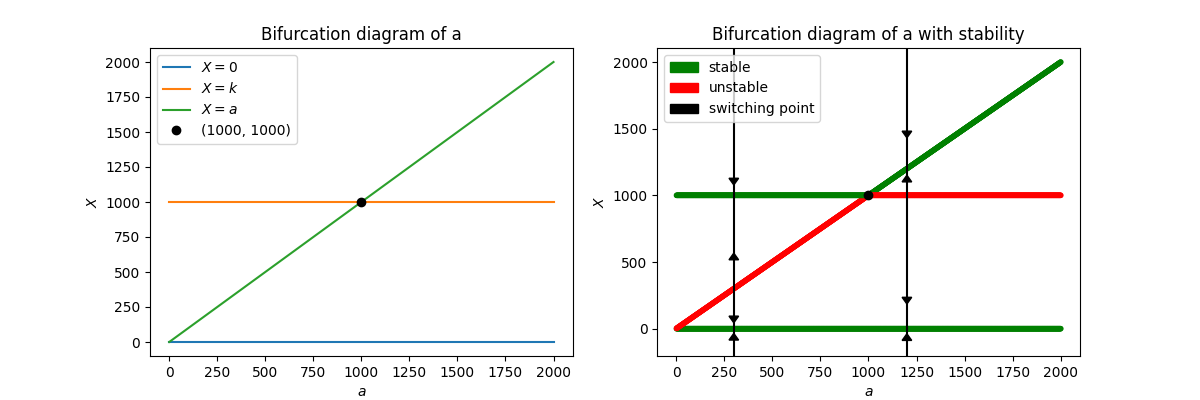

In [5]:
"""
plotting equilibria lines for the Allee equation
"""

%matplotlib widget

# init plots
f1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# plot the stability lines
ax1.plot(a, x_1, label='$X = 0$')
ax1.plot(a, x_2, label='$X = k$')
ax1.plot(a, x_3, label='$X = a$')

# add a black dot on the intersection
ax1.plot(k, k, label='({}, {})'.format(k, k), marker='o', linestyle='none', color='Black')

# add title, labels and legend
ax1.set_title('Lines of equilibria in function of a')
ax1.set_xlabel('$a$')
ax1.set_ylabel('$X$')
ax1.legend()


"""
plotting stability of equilibria for the allee equation
"""

# calculate the color arrays for each stability line
c1 = stability(x_1[1:], allee_eq, a[1:])
c2 = stability(x_2[1:], allee_eq, a[1:])
c3 = stability(x_3[1:], allee_eq, a[1:])

# plot each stability line
ax2.scatter(a[1:], x_1[1:], c=c1, marker='.', label='')
ax2.scatter(a[1:], x_3[1:], c=c3, marker='.')
ax2.scatter(a[1:], x_2[1:], c=c2, marker='.')

# add a black point on the intersection
ax2.plot(k, k, label='({}, {})'.format(k, k), marker='o', linestyle='none', color='Black')

# plot the arrows
plot_arrow(300., np.array([-100., 100., 500., 1200.]), ax2, func=allee_eq)
plot_arrow(1200., np.array([-100., 250., 1100., 1500.]), ax2, func=allee_eq)

# add title, labels and legend
ax1.set_title('Bifurcation diagram of a')
ax1.set_xlabel('$a$')
ax1.set_ylabel('$X$')
ax2.set_title('Bifurcation diagram of a with stability')
ax2.set_xlabel('$a$')
ax2.set_ylabel('$X$')
ax2.legend(handles=[mpatches.Patch(color='green', label='stable'),
                    mpatches.Patch(color='red', label='unstable'),
                    mpatches.Patch(color='black', label='switching point')], loc='upper left')
plt.show()

<h2> 4.2 Saddle-node bifurcation </h2>
<h3> 4.2.1 The lac operon </h3>

In [6]:
"""
Constants and function for the Lac operon
"""

a = 0.006


def lac_func(X, r):
    """
    the Lac operon function
    """
    return (a + X**2) / (1 + X**2) - r*X

In [7]:
"""
Calculate the X and Y values for the Allee equation
"""

# define the limits of the axis and number of points
xlim1 = 0.001
xlim2 = 10
lenx = 1000

# create arrays for the values of a and X for different stability points
X = np.linspace(xlim1, xlim2, lenx)
R = (a + X**2) / (X + X**3)

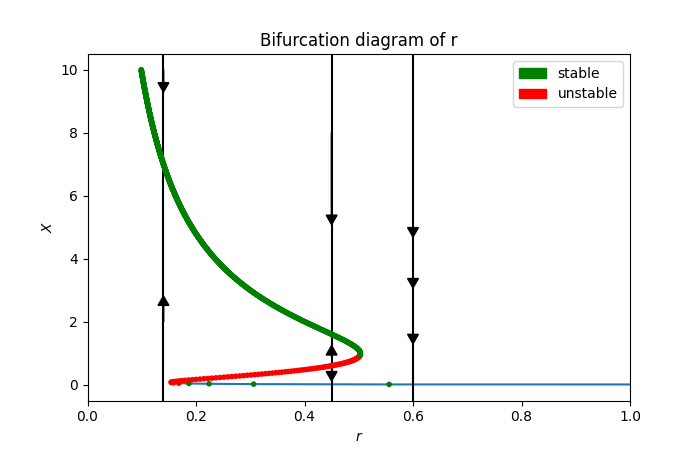

In [8]:
%matplotlib widget

# init plots
f3 = plt.figure(figsize=(7, 4.5))
ax3 = f3.add_subplot()
ax3.set_xlim(0, 1)

# plot the background line for the bottom part since there
# will be a low density of points there
ax3.plot(R, X)

# calculate the stability and plot the values with the color array
c = stability(X[1:], lac_func, R[1:])
ax3.scatter(R[1:], X[1:], c=c, marker='.', zorder=15)

# plot the arrows
plot_arrow(0.14, np.array([2,10]), ax3, func=lac_func, hwidth=0.02, hlength=0.3)
plot_arrow(0.45, np.array([0.45, 0.9, 8]), ax3, func=lac_func, hwidth=0.02, hlength=0.3)
plot_arrow(0.6, np.array([2, 6, 10]), ax3, func=lac_func, hwidth=0.02, hlength=0.3)

ax3.legend(handles=[mpatches.Patch(color='green', label='stable'),
                    mpatches.Patch(color='red', label='unstable')], loc='upper right')

# add title, labels and legend
ax3.set_xlabel('$r$')
ax3.set_ylabel('$X$')
ax3.set_title('Bifurcation diagram of r')
plt.show()

<h3> 4.2.2 The spruce budworm </h3>

In [9]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.

    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.

    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    #m = n / arrays[0].size
    m = int(n / arrays[0].size) 
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m, 1:])
        for j in range(1, arrays[0].size):
        #for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m, 1:] = out[0:m, 1:]
    return out

In [10]:
rmin = 0.01
rmax = 0.6
kmin = 1
kmax = 60
dim_1 = 60


def budworm_eq(x, r, k):
    return r*x*(1 - x/k) - x**2 / (1 + x**2)


def solve_budworm(k, r):
    x = Symbol('x')
    return solve(budworm_eq(x, r, k))


def calc_eq_points(c):
    eq_points_map = map(solve_budworm, c.T[0], c.T[1])
    eq_points = np.array(np.cdouble(list(eq_points_map)))
    eq_points[np.abs(np.imag(eq_points)) > 0.01] = 0
    eq_points = np.array([np.trim_zeros(np.real(i)) for i in eq_points], dtype=object)
    return eq_points


def create_matrix(c, dim):
    eq_p = calc_eq_points(c)
    n_points = [len(i) for i in eq_p]
    a = np.zeros((dim, dim))
    n = 0
    for i in range(dim):
        for j in range(dim):
            a[j, i] = n_points[n] + 1
            n += 1
    return a


r = np.linspace(rmin, rmax, dim_1)
k = np.linspace(kmin, kmax, dim_1)
c = cartesian([k, r])
a = create_matrix(c, dim_1)

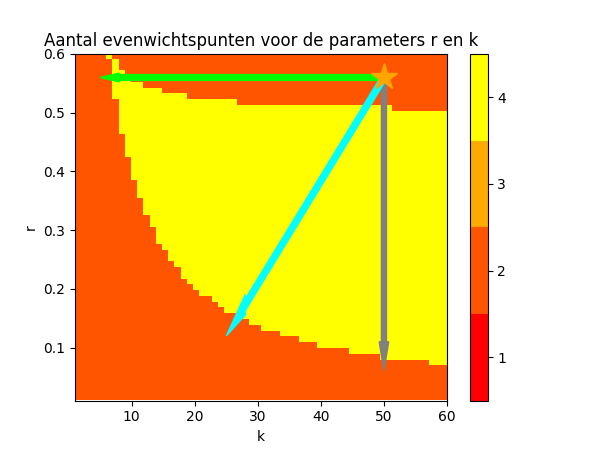

In [11]:
%matplotlib widget

bounds=[0.5, 1.5, 2.5, 3.5, 4.5]
cmap = mpl.cm.get_cmap('autumn')
norm = colors.BoundaryNorm(bounds, cmap.N)

f_1, ax_1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 4.5))

img = plt.imshow(a, interpolation='nearest', origin='lower', aspect='auto', cmap=cmap, norm=norm, extent=[1, 60, 0.01, 0.6])
plt.colorbar(img, boundaries=bounds, ticks=[0, 1, 2, 3, 4])
ax_1.set_title('Aantal evenwichtspunten voor de parameters r en k')
ax_1.plot(50, 0.56, 'orange', marker="*", markersize=20)
ax_1.arrow(50, 0.56,0,-0.5, width=0.8, length_includes_head=True, head_width=1.5, head_length=0.05, color='gray')
ax_1.arrow(50, 0.56,-45,0, width=0.01, length_includes_head=True, head_width=0.015, head_length=3, color='lime')
ax_1.arrow(50, 0.56,-25,-0.44, width=0.02, length_includes_head=True, head_width=0.035, head_length=3, color='cyan')
ax_1.set_xlabel('k')
ax_1.set_ylabel('r')
plt.show()

In [12]:
dim_2 = 20

r_ = np.zeros(2000)
k_ = np.zeros(2000)
x_ = np.zeros(2000)

r_2 = np.linspace(rmin, rmax, dim_2)
k_2 = np.linspace(kmin, kmax, dim_2)
c_2 = cartesian([k_2, r_2])

r_c = c_2.T[1]
k_c = c_2.T[0]

eq_points = calc_eq_points(c_2)

n=0
for i in range(len(eq_points)):
    e = eq_points[i]
    for j in e:
        r_[n] = r_c[i]
        k_[n] = k_c[i]
        x_[n] = j
        n+=1
        
    r_[n] = r_c[i]
    k_[n] = k_c[i]
    x_[n] = 0
    n+=1

r_ = r_[:n]
k_ = k_[:n]
x_ = x_[:n]
colors_3D = stability(x_, budworm_eq, r_, k_)

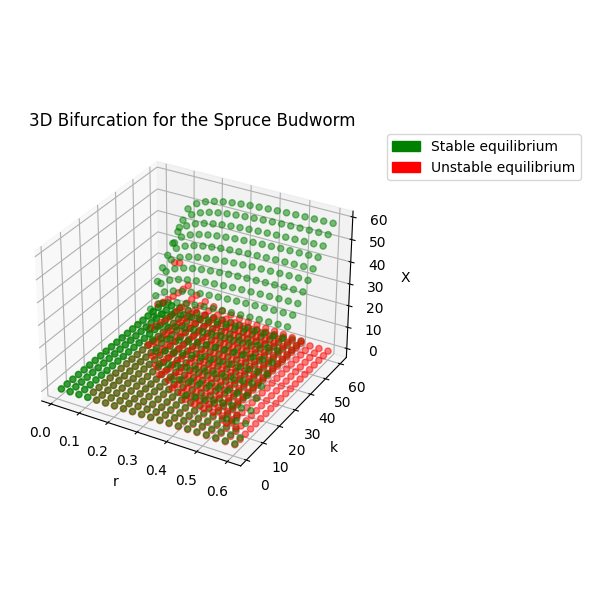

In [13]:
%matplotlib widget

fig_2 = plt.figure(figsize=(6, 6))
ax_2 = fig_2.add_subplot(projection='3d')
ax_2.scatter(r_, k_, x_, c=colors_3D, alpha=0.5)
ax_2.set_xlabel('r')
ax_2.set_ylabel('k')
ax_2.set_zlabel('X')
ax_2.legend(handles=[mpatches.Patch(color='green', label='Stable equilibrium'),
                     mpatches.Patch(color='red', label='Unstable equilibrium')],
                     bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
ax_2.set_title("3D Bifurcation for the Spruce Budworm")
fig_2.tight_layout()
plt.show()

<h3> 4.2.3 Pitchfork Bifurcation </h3>

In [14]:
v = 1
a = 1.3


def pf_eq_np(x, a=1.3):
    return (1 - x)*v*np.exp(a*x) - (1 + x)*v* np.exp(-a*x)


def pf_eq_sp(x, a):
    return (1 - x)*v*exp(a*x) - (1 + x)*v* exp(-a*x)


def pitchfork_roots(a):
    x = Symbol('x')
    root1 = np.zeros(len(a))
    root2 = np.zeros(len(a))
    root3 = np.zeros(len(a))
    for i in range(len(a)):
        root1[i] = nsolve(pf_eq_sp(x, a[i]), x, -1)
        root2[i] = nsolve(pf_eq_sp(x, a[i]), x, 0)
        root3[i] = nsolve(pf_eq_sp(x, a[i]), x, 1)
    return [root1, root2, root3]

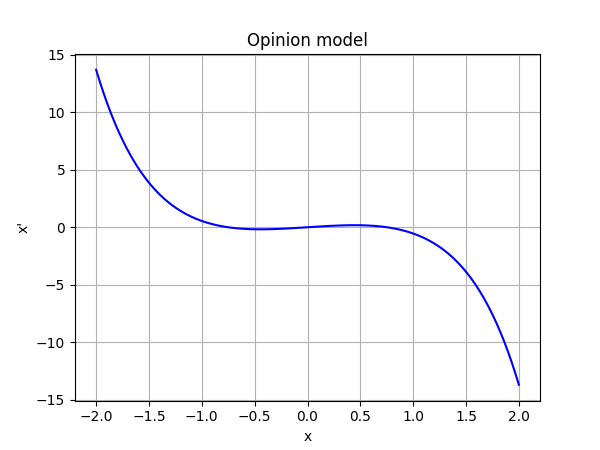

In [15]:
%matplotlib widget

x = np.linspace(-2, 2, 1000)

fig_3 = plt.figure(figsize=(6, 4.5))
ax_3 = fig_3.add_subplot()

ax_3.plot(x, pf_eq_np(x), c='blue')
ax_3.set_xlabel('x')
ax_3.set_ylabel("x'")
ax_3.set_title('Opinion model')
ax_3.grid()
plt.show()

In [16]:
a = np.linspace(0, 2, 1000)
root_1, root_2, root_3 = pitchfork_roots(a)

c_1 = stability(root_1[1:], pf_eq_np, a=a[1:], dt=0.01, pert=0.01)
c_2 = stability(root_2[1:], pf_eq_np, a=a[1:], dt=0.01, pert=0.01)
c_3 = stability(root_3[1:], pf_eq_np, a=a[1:], dt=0.01, pert=0.01)

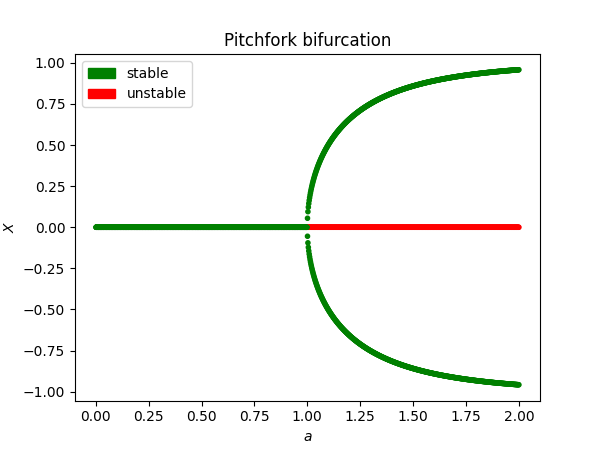

In [17]:
%matplotlib widget

fig_4 = plt.figure(figsize=(6, 4.5))
ax_4 = fig_4.add_subplot()

ax_4.scatter(a[1:], root_1[1:], c=c_1, marker='.')
ax_4.scatter(a[1:], root_2[1:], c=c_2, marker='.')
ax_4.scatter(a[1:], root_3[1:], c=c_3, marker='.')

# add title, labels and legend
ax_4.set_title('Pitchfork bifurcation')
ax_4.set_xlabel('$a$')
ax_4.set_ylabel('$X$')
ax_4.legend(handles=[mpatches.Patch(color='green', label='stable'),
                     mpatches.Patch(color='red', label='unstable')], loc='upper left')
plt.show()

<h2> 4.3 Extra exercises </h2>
<h3> 4.3.1 One parameter </h3>

The functions are:

1.   $\quad rX + X^3 - X^5$
2.   $\quad rX + X^2 - X^3$
3.   $\quad rX - \dfrac{X}{1+X^2}$
4.   $\quad X - r + \dfrac{2-X}{1+X^2}$

We find the following roots:
1.   $\quad X=0 \quad X=\pm\sqrt{\dfrac{1}{2} \pm\sqrt{\dfrac{1}{4} + r}}$
2. $\quad X=0\quad X = \dfrac{1}{2} \pm \sqrt{\dfrac{1}{4}+r}$
3. $\quad X=0 \quad X = \pm\sqrt{\dfrac{1}{r} -1}$
4. $\quad$ implicit: $\quad r = X + \dfrac{2-X}{X^2 + 1}$

We can do this numerically as well but that takes a lot longer

In [18]:
def create_root_space(lims, dims=1000):
    return [np.linspace(lims[i][0], lims[i][1], dims) for i in range(len(lims))]
        


def f_1(x, r):
    return r*x + x**3 - x**5


def f_2(x, r):
    return r*x + x**2 - x**3


def f_3(x, r):
    return r*x - x/(1 + x**2)


def f_4(x, r):
    return x - r + (2 - x)/(1 + x**2)


def root_1():
    limits = [(-1, 2), (-0.25, 2), (-0.25, 0), (-0.25, 2), (-0.25, 0)]
    l = create_root_space(limits)
    roots = [np.zeros(len(l[0])), 
            np.sqrt(0.5 + np.sqrt(0.25 + l[1])), 
            np.sqrt(0.5 - np.sqrt(0.25 + l[2])), 
            -np.sqrt(0.5 + np.sqrt(0.25 + l[3])), 
            -np.sqrt(0.5 - np.sqrt(0.25 + l[4]))]
    return zip(roots, l)


def root_2():
    limits = [(-1, 2), (-0.25, 2), (-0.25, 2)]
    l = create_root_space(limits)
    roots = [np.zeros(len(l[0])), 0.5 + np.sqrt(0.25 + l[1]), 0.5 - np.sqrt(0.25 + l[2])]
    return zip(roots, l)


def root_3():
    limits = [(0, 1.5), (0.1, 1), (0.1, 1)]
    l = create_root_space(limits)
    roots = [np.zeros(len(l[0])), np.sqrt(1/l[1] -1), -np.sqrt(1/l[2] -1)]
    return zip(roots, l)


def solve_f_4(r):
    x = Symbol('x')
    return solve(f_4(x, r))


def calc_eq_points_2(r):
    eq_points_map = map(solve_f_4, r)
    eq_points = np.array([np.cdouble(i) for i in eq_points_map])
    eq_points[np.abs(np.imag(eq_points)) > 0.01] = 0
    eq_points = np.array([np.trim_zeros(np.real(i)) for i in eq_points], dtype=object)
    return eq_points


def root_4():
    limits = [(1, 2.5)]
    r = np.linspace(1, 2.5, 100)
    a = calc_eq_points(r)
    for i in a:
        print(a)

In [19]:
def plot_bifurcation(roots, func, ax, title):
    for x, r in roots:
        c = stability(x, func, r, dt=0.01, pert=0.01)
        ax.scatter(r, x, c=c, marker='.')
        ax.set_xlabel('r')
        ax.set_ylabel('x')
        ax.set_title(title)
        ax.legend(handles=[mpatches.Patch(color='green', label='stable'),
                     mpatches.Patch(color='red', label='unstable')])

In [20]:
r_ = np.zeros(5000)
x_ = np.zeros(5000)
r_2 = np.linspace(1, 2.5, 900)

eq_points = calc_eq_points_2(r_2)

n=0
for i in range(len(eq_points)):
    e = eq_points[i]
    for j in e:
        r_[n] = r_2[i]
        x_[n] = j
        n+=1

r_ = r_[:n]
x_ = x_[:n]
c_ = stability(x_, f_4, r_, dt=0.01, pert=0.01)

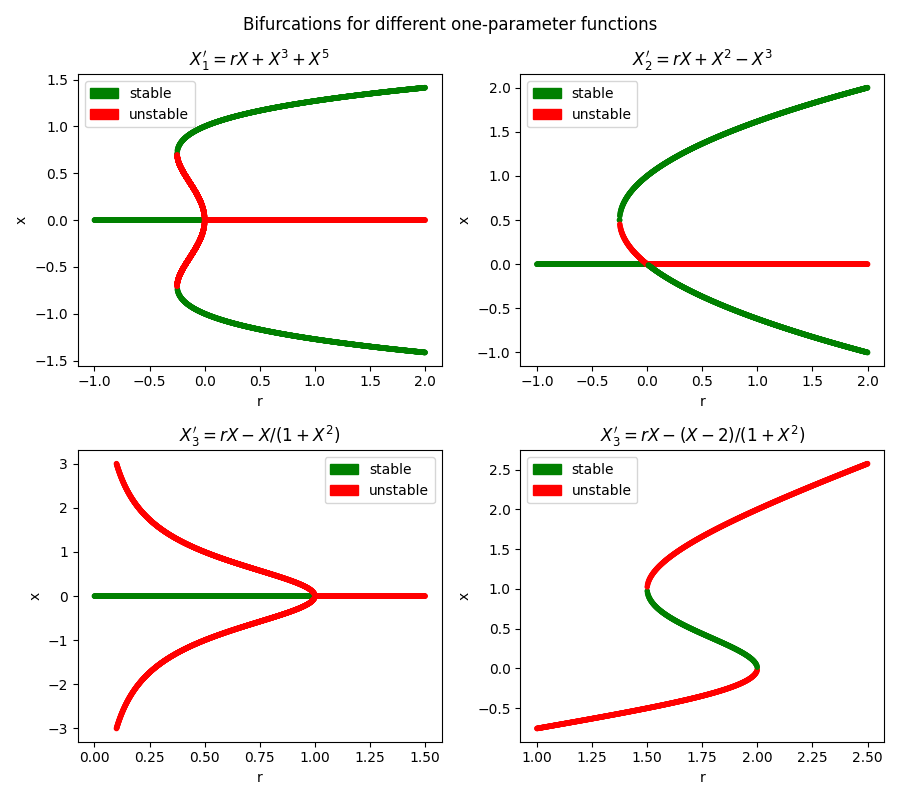

In [21]:
%matplotlib widget

f, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 8))
plot_bifurcation(root_1(), f_1, axes[0][0], title="$X_1' = rX + X^3 + X^5$")
plot_bifurcation(root_2(), f_2, axes[0][1], title="$X_2' = rX + X^2 - X^3$")
plot_bifurcation(root_3(), f_3, axes[1][0], title="$X_3' = rX - X / (1+X^2)$")
axes[1][1].scatter(r_, x_, c=c_, marker='.')
axes[1][1].set_xlabel('r')
axes[1][1].set_ylabel('x')
axes[1][1].set_title("$X_3' = rX - (X-2) / (1+X^2)$")
axes[1][1].legend(handles=[mpatches.Patch(color='green', label='stable'),
                           mpatches.Patch(color='red', label='unstable')])
f.suptitle("Bifurcations for different one-parameter functions")
f.tight_layout()

In [ ]:
<h3> 4.3.2 Two parameters </h3>